In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [5]:
db_parameters = {
    'host':'localhost',
    'user':os.getenv('mysql_user'),
    'password':os.getenv('mysql_password'),
    'database':'skillsights'
}

In [16]:
# Connect to MySQL
db_conn = mysql.connector.connect(**db_parameters)
cursor = db_conn.cursor()

In [13]:
queries = {
    'students_per_course': """
        SELECT c.course_name, COUNT(sc.student_id) AS student_count
        FROM Course c
        LEFT JOIN StudentCourse sc ON c.course_id = sc.course_id
        GROUP BY c.course_name;
    """,
    'payments_by_mode': """
        SELECT payment_mode, sum(amount) as total_amount, COUNT(*) AS payment_count
        FROM StudentPayment
        GROUP BY payment_mode;;
    """,
    'organization_contracts': """
        SELECT o.name AS organization_name, oc.contract_status,oc.contract_price
        FROM Organization o
        JOIN OrgContract oc ON o.organization_id = oc.organization_id;
    """
}

## Execute Queries on MySQL Database

In [17]:
# Execute queries and store DataFrames
dataframes = {}
for key, query in queries.items():
    cursor.execute(query)
    columns = [desc[0] for desc in cursor.description]
    rows = cursor.fetchall()
    df = pd.DataFrame(rows, columns=columns)
    dataframes[key] = df

# Close connection
cursor.close()
db_conn.close()

## Data Visualization

/var/folders/h1/vrz3fjk53dd70gjbh9xjz6180000gn/T/ipykernel_26359/2346628514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='course_name', y='student_count', data=dataframes['students_per_course'], palette='viridis')


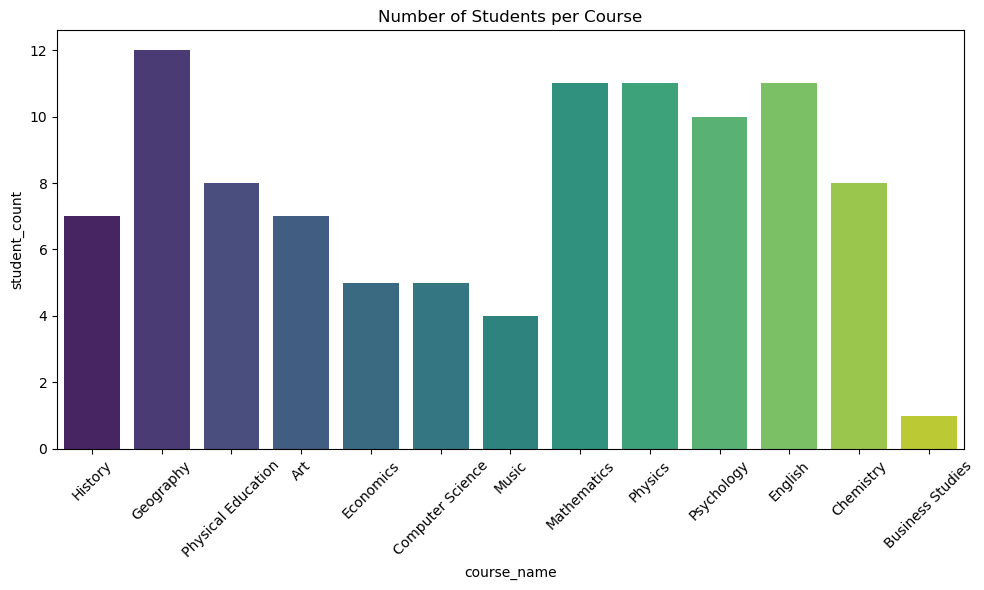

In [18]:
# 1. Students per course - Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='course_name', y='student_count', data=dataframes['students_per_course'], palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Students per Course')
plt.tight_layout()
plt.show()

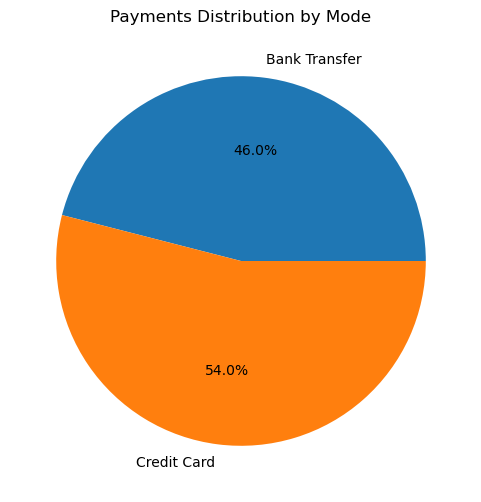

In [24]:
# 2. Payments by mode - Pie chart
plt.figure(figsize=(6, 6))
payments_df = dataframes['payments_by_mode']
plt.pie(payments_df['payment_count'], labels=payments_df['payment_mode'], autopct='%1.1f%%')
plt.title('Payments Distribution by Mode')
plt.show()

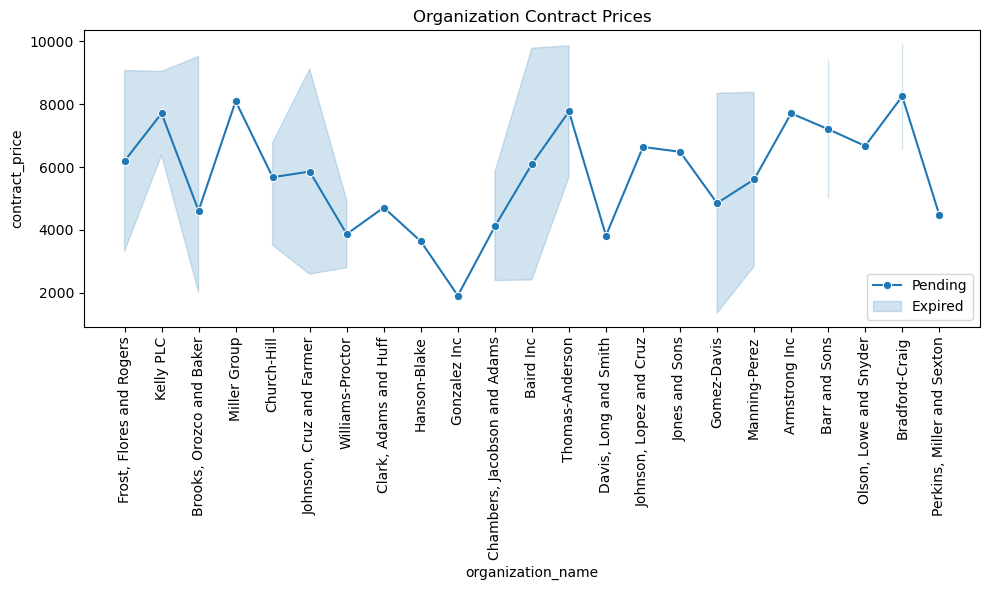

In [33]:
# 3. Organization contracts - Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='organization_name', y='contract_price', data=dataframes['organization_contracts'], marker='o')
plt.xticks(rotation=90)
plt.legend(dataframes['organization_contracts']['contract_status'])
plt.title('Organization Contract Prices')
plt.tight_layout()
#plt.savefig('organization_contracts.png')
plt.show()